# Machine Learning Deep Dive Sessions

Over the next three sessions we are going to take a deeper dive into machine learning (ML) in astronomy.
The focus of these sessions is to:
1. Give a theoretical background on a few ML tasks
1. All you to gain experience using ML models
1. Provide you an understanding of how to evaluate a ML model's success
1. Inspire you to explore more and try ML in your research

To aid us in the above we will be using the [`scikit-learn`](https://scikit-learn.org/stable/) [Python](https://www.python.org/) package.
Whilst this is easily enough installed on your own machine, we will be using Jupyter notebooks within the [Google Colaboratory](https://colab.research.google.com/).

In order to participate in this series of workshops you will need:
1. An understanding of the Python language
1. A google account


## tinyurl.com/ASADeepDive2023

^ Head to this link to access the course materials

Open the file "Deep Dive I - Challenges"

Select File -> "Save a copy in Drive"
(login to google and approve the "colaboratory" app if asked)

# Deep Dive `I`

Today we'll be taking a deep dive into **classification**.

In this session our aims are:
1. Understand the KNN algorithm for classification and regression,
1. Explore some of the methods by which we can estimate the behaviour of a ML model on unseen data,
1. Download and explore some astronomy datasets,
1. Perform some basic data cleaning and feature selection,
1. Train and evaluate a KNN model for classifying objects as STAR/GALAXY based on optical magnitudes
1. Train and evaluate a decision tree for the same
1. Review the performance of our models and discuss the lessons learned.


## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing.
They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.
Jupyter notebooks are a great way to explore ideas and explain results.

Jupyter notebooks consist of two types of cells:
- Code cells which are for python code
  - There will be a `[ ]` to the left of the cell and the background is gray
  - When you *execute* a code cell the `[ ]` will be replaced with a number (eg `[1]`) indicating the order in which the cells are executed, and the output (if any) will be shown directly below the cell.
- Text (markdown) cells which are for writing text
  - The background is white, and your markdown formatted text is rendered as you type.
  - When you *execute* a text cell, you will see your rendered text.


You can create a new Code or Text cell by clicking the `+Code` or `+Text` button at the top of the notebook window.

You can execute a cell by one of:
- pressing the play button to the left of a code cell (hover the `[ ]` to see it)
- pressing SHIFT+ENTER
- pressing CTRL+ENTER (on a code cell)
- selecting an option from the *Runtime* menu

### Running code, installing packages, importing libraries
![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

(The above icon is the "Challenge" icon, and indicates that there is work for you to do)

Select the following cell and execute it with one of the options from above.
Note how the `[ ]` changes to a `[1]` and that there is no output.
The first time you execute a code cell in your notebook it will take a while as Google will be setting up a python runtime (kernel) in the backend, before running your code.
Once you have run one cell, you'll see the time it took to execute and a green tick to the left of the cell.

Re-execute the cell, and note how the number in `[ ]` increases.**bold text**

In [ ]:
print("G'Day from ADACS")

G'Day from ADACS


Google colaboratory comes with a whole set of pre-installed python modules.
We can see these modules using the `pip freeze` command.
To send this command to the terminal instead of the python interpreter we need to put a `!` at  the start of the line.
Let's do this now:

In [ ]:
! pip freeze

absl-py==1.4.0
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.7.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.4.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
audioread==3.0.0
autograd==1.6.1
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cached-property==1.5.2
cachetools==5.3.1
catalogue==2.0.8
certifi==2023.5.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.6
contextlib2==0.6.0.post1
contourpy==1.1.0
convertdate==2.4.0
cufflinks==0.17.3
cvxopt==1.3.1
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.35
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-p

If we wanted to use a package that isn't already installed (or upgrade one that is) we can use `! pip install <package>`

In [ ]:
! pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


If you install a new package then you'll sometimes have to restart your runtime before you have access to that package.
This typically only happens when you upgrade an existing package that you have already imported.
Restart your runtime if needed, and then execute the cell below which includes all the modules that we'll be working with.

In [ ]:
# data reading and manipulation libraries
import numpy as np
import pandas as pd
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning tools
import sklearn
from sklearn import metrics, model_selection, tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
print(f"Numpy:        {np.__version__}")
print(f"Pandas:       {pd.__version__} <- ensure this is 2.0 or higher")
print(f"Matplotlib:   {matplotlib.__version__}")
print(f"Seaborn:      {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")

Numpy:        1.22.4
Pandas:       2.0.3 <- ensure this is 2.0 or higher
Matplotlib:   3.7.1
Seaborn:      0.12.2
Scikit-learn: 1.2.2


![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Check that your version of Pandas is up todate, and restart your kernel if it is not.

## 1. The K-nearest neighbors (KNN) algorithm

The KNN algorithm is effectively a memorization engine that works on discrete or continuous data, and which can be used to perform classification or regression tasks.

The KNN algorithm effectively works by wrote learning (eg storage) of reference data.
When presented with a new data point for inference (prediction) the KNN algorithm will compare the new data point to each of the points it has learned and make the assumption that if the new data point is similar to a known data point then it must have the same class or value.

As demonstrated below, assume we have a set of data for which we measure two attributes $(x_1, x_2)$ and a class label $(A|B)$ for each.
In the visualisation below the green/orange colours represent the class labels for the data.
To use the KNN algorithm to classify a new data point (blue in the diagram below), we locate it in the parameter space and look for the nearest neighbor data point, and copy that class label.
In the case below the nearest neighbor is green, so we assign the new data point to category A.

![KNN example](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

The K-NN algorithm has the following attributes which can be changed to modify the algorithm:
- K
  - The number of neighbors that are considered when choosing a category.
  - For a binary classification task (2 labels), this value is usually set to be an odd number so that there are no 'ties' when deciding the label of the new data point.
- Distance metric
  - By default this is often the Euclidian distance $D(x,y)=\sqrt{\Sigma_i^n(x_i-y_i)^2}$
  - Other common metrics are the "Manhattan" or "Taxi Driver" distance $D(x,y) = \Sigma_i|x_i-y_i|$, or the "Chebyshev" distance $D(x,y) = max_i|x_i-y_i|$
- weight
  - When K>1, a weighting scheme is often used to combine information from the nearest neighbors
  - Typically this will either be "unifrom" or "distance" based weighting


The distance metric is often refered to as a "Norm" and abbreviated to:
$D(x,y) = (\Sigma_i^n|x_i-y_i|^p)^{1/p}$ as being the $L_p$ norm.

$L_1$ is the Manhattan distance, $L_2$ is the Euclidean distance, and $L_∞$ is the Chebyshev distance.

### Data scale
For algorithms such as KNN where distance or density calculations are key to the algorithm, it is important for the different dimensions of data (data attributes) to have a similar scale, otherwise you risk biasing the model to the attributes with the larger (or smaller) scale.

Consider measuring a persons age in years, and height in meters.
People who differ in age by 1 year or in height by 1 meter would be considered to be "equally different".

Note that the units of measurement are not important here, but the magnitude of the values.
An important part of data preparation is scaling data so that each dimension/attribute has the same scale.
Normalising data to have $\mu=0, \sigma=1$, or $min=-1, max=1$, (depending on the data distributions) is a good start.

### Classificaiton vs Regression
The destinction between classification and regression depends on whether the output data are to be discrete (classification) or continuous (regression).
During inference (prediction) the operation of the KNN algorithm proceeds as above to select up to $K$ neighbors around a point which is being considered.

In classification, the labels(classes) of each of the neighbors are compared. The predicted label is set to be the same as the majority of the nearest neighbors. If a weighting scheme is used then this 'vote' is weighted accordingly.
If a tie occurs then the choice of class is often chosen at random.

In regression, the value of the attribute to be predicted is read from each of the neighbors and then averaged.
If a weightings scheme is used then this becomes a weighted average.


## 2. Download and explore data


I have prepared a dataset for this workshop which we'll be using today.
The data are a subset of [SDSS DR18](https://arxiv.org/pdf/2301.07688.pdf) which were retrieved from https://skyserver.sdss.org/dr18/SearchTools/sql.

The data are highly proccessed with much calibration, validation, and value add.
The data are therefore **far** from what you would typically deal with in terms of the amount of pre-processing that is required, however we are going to skip the data cleaning for now.

### Downloading
![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Please download the data from [link](https://raw.githubusercontent.com/PaulHancock/2023-ASA-ML-DeepDive/main/SDSS_1k_withElodie.csv) to inspect it on your local machine, or by executing the following to pull the file directly into your colaboratory environment.



In [ ]:
# use Wget to download the data
! wget https://raw.githubusercontent.com/PaulHancock/2023-ASA-ML-DeepDive/main/SDSS_1k_withElodie.csv

--2023-07-05 23:09:51--  https://raw.githubusercontent.com/PaulHancock/2023-ASA-ML-DeepDive/main/SDSS_1k_withElodie.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177138 (173K) [text/plain]
Saving to: ‘SDSS_1k_withElodie.csv’

SDSS_1k_withElodie. 100%[===================>] 172.99K  --.-KB/s    in 0.005s  

2023-07-05 23:09:51 (33.6 MB/s) - ‘SDSS_1k_withElodie.csv’ saved [177138/177138]



If the above worked then you should see the file appear in your explorer:

![FileDLSuccess](https://github.com/PaulHancock/2023-ASA-ML-DeepDive/blob/main/figures/FileDLSuccess.png?raw=true)

### Exploration

The first step is to load the data.
We will use Pandas to load the `.csv` format data into a [`pandas`](https://pandas.pydata.org/docs/index.html) DataFrame.
Pandas DataFrames offer a lot of convenience functions for visualising and manipulating tabular data and also interact nicely with the `scikit-learn` module.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Use the `pd.read_csv` function to load the data into a variable called `combined_df`

In [ ]:
combined_df = pd.read_csv('SDSS_1k_withElodie.csv')

Typing the name of a variable on the last line of a Jupyter notebook cell will cause it to be printed as output.
Pandas dataframes are aware that they are being used within a notebook and so provide us with some pretty display options.

In [ ]:
combined_df

,objid,ra,dec,u,g,r,i,z,run,rerun,...,specobjid,class,redshift,plate,mjd,fiberid,SpType,BV,TEff,FeH
0,1237652628565393479,8.628871,-11.177777,17.93322,16.53652,15.98814,15.77386,15.68753,1666,301,...,3495934135103496192,STAR,-0.000140,3105,54825,54,G5,0.717,5426,-0.04
1,1237652628565393493,8.540218,-11.086299,19.23722,17.95485,17.41249,17.17080,17.08046,1666,301,...,3495933860225589248,STAR,-0.000248,3105,54825,53,G8Vp,0.754,5047,-1.34
2,1237652628565458954,8.690695,-11.196989,18.12874,17.26027,16.88616,16.74379,16.65587,1666,301,...,3495925613888380928,GALAXY,0.000000,3105,54825,23,NaN,0.000,0,0.00
3,1237652628565524509,8.872341,-11.234788,18.49931,17.14666,16.53265,16.26171,16.10111,1666,301,...,3495922040475590656,STAR,-0.000800,3105,54825,10,G0,0.562,5236,-2.27
4,1237652629102264370,8.578170,-10.761296,18.54313,17.26137,16.75226,16.54153,16.44762,1666,301,...,3495930561690705920,STAR,-0.000111,3105,54825,41,G5Vp,0.704,5320,-0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1237660345012191258,149.716065,42.794821,18.66440,18.51936,18.89729,19.17073,19.58694,3462,301,...,5139934379167209472,STAR,-0.000109,4565,55591,732,K3III,1.299,4395,-0.01
996,1237678601846587485,10.766937,17.775423,18.44646,18.22444,17.94784,17.95393,17.93085,7713,301,...,12430119006731786240,QSO,1.128717,11040,58456,669,NaN,0.000,0,0.00
997,1237659133280714857,211.424114,52.873045,19.31905,18.43767,18.15993,18.06758,18.04578,3180,301,...,7911879898104616960,STAR,-0.000288,7027,56448,659,M1V,1.474,3705,0.60
998,1237658803118604352,211.596110,53.021195,19.16953,18.24884,18.11470,18.08295,18.14636,3103,301,...,7911891168098801664,STAR,-0.000336,7027,56448,700,K7V,1.363,3900,0.17


Even with all the pretty display there are too many rows and columns for us to see all the data at once, so we have been shown `...` to indicate that some rows/columns were skipped.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

View a summary of the (numerical) columns using the `.describe()` method of the `combined_df` data frame.

In [ ]:
combined_df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,BV,TEff,FeH
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.237660e+18,145.173429,20.196492,18.699525,17.440345,16.899536,16.639291,16.472541,3361.938000,301.0,3.648000,177.906000,2.532929e+18,0.143119,2249.608000,53647.724000,346.165000,0.224270,2097.267000,-0.233740
std,6.040543e+12,75.524710,20.775729,0.737702,0.906664,1.051657,1.131158,1.212549,1406.436939,0.0,1.614529,115.247738,2.469729e+18,0.362688,2193.552969,1504.019764,193.042008,0.403371,2832.264998,0.546679
min,1.237646e+18,0.026443,-11.234788,15.719180,13.812590,12.973070,12.563950,12.271530,109.000000,301.0,1.000000,14.000000,3.007912e+17,-0.001330,267.000000,51608.000000,1.000000,-0.199000,0.000000,-2.500000
25%,1.237657e+18,126.432410,4.138074,18.309740,16.860760,16.160645,15.850062,15.611530,2728.000000,301.0,2.000000,89.000000,1.005500e+18,-0.000011,893.000000,52589.000000,172.500000,0.000000,0.000000,-0.170000
50%,1.237658e+18,156.977843,9.359544,18.886615,17.533855,16.895885,16.618760,16.418525,2986.000000,301.0,4.000000,160.000000,2.028877e+18,0.048916,1802.000000,53468.000000,362.000000,0.000000,0.000000,0.000000
75%,1.237662e+18,205.182386,40.458009,19.264840,18.061935,17.584267,17.321715,17.206150,3909.000000,301.0,5.000000,228.000000,3.495925e+18,0.092070,3105.000000,54738.000000,510.000000,0.518000,5152.000000,0.000000
max,1.237679e+18,339.944681,53.951970,19.597500,19.552760,19.610670,19.945900,20.237120,7881.000000,301.0,6.000000,824.000000,1.410217e+19,2.676806,12525.000000,58932.000000,980.000000,1.633000,9899.000000,0.600000


We can see that there are columns that describe the object of interest (ra, dec $u, g, r, i, z,$ redshift, BV, TEff, FeH), as well as a bunch of columns that describe the data processing (objid, run, rerun, camcol, field).

Note that the above only shows the numerical type columns (int/float), and not the categorical or string like columns.
To see *all* the column names we can view the `.columns` attribute:

In [ ]:
combined_df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid',
       'SpType', 'BV', 'TEff', 'FeH'],
      dtype='object')

We can now see that there is also "class" and "SpType" columns.

Lets see a few values from each of these columns.

In [ ]:
# Index our data frame using a list of column names (hence the double square brackets - 1 for indexing, 1 for the list)
# use the .head() method to show the first few rows.
combined_df[ ['class','SpType'] ].head(15)

,class,SpType
0,STAR,G5
1,STAR,G8Vp
2,GALAXY,NaN
3,STAR,G0
4,STAR,G5Vp
5,QSO,NaN
6,STAR,G5Vp
7,STAR,K3V
8,QSO,NaN
9,STAR,unknown


We can look at the 'class' column to see what values are present, and then run `.describe()` to get a short summary.

In [ ]:
# List the unique entries in the 'class' column
combined_df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

We can poke around with pandas for a while to explore the stats for different columns, but plotting is often a better way to summarise the data.

Pandas DataFrames have a `.plot` method which sort of just works out of the box.
We can provide a keyword of `kind` to produce different plots.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Create a "box" plot of the $(u,g,r,i,z)$ columns.

<Axes: >

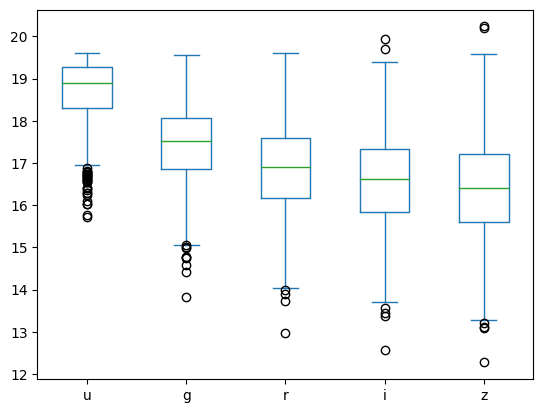

In [ ]:
#combined_df[ <list of columns> ].plot(?)
combined_df[ ['u','g','r','i','z'] ].plot(kind='box')

We can also make use of the seaborn module (imported as `sns`) to make fancier plots such as a pairplot.
We can even use one of the attributes to colour the plot.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Experiment with different sets of columns and colour coding.
It's best to keep the colour coding (`hue`) to use categorical attributes or to not use it at all.

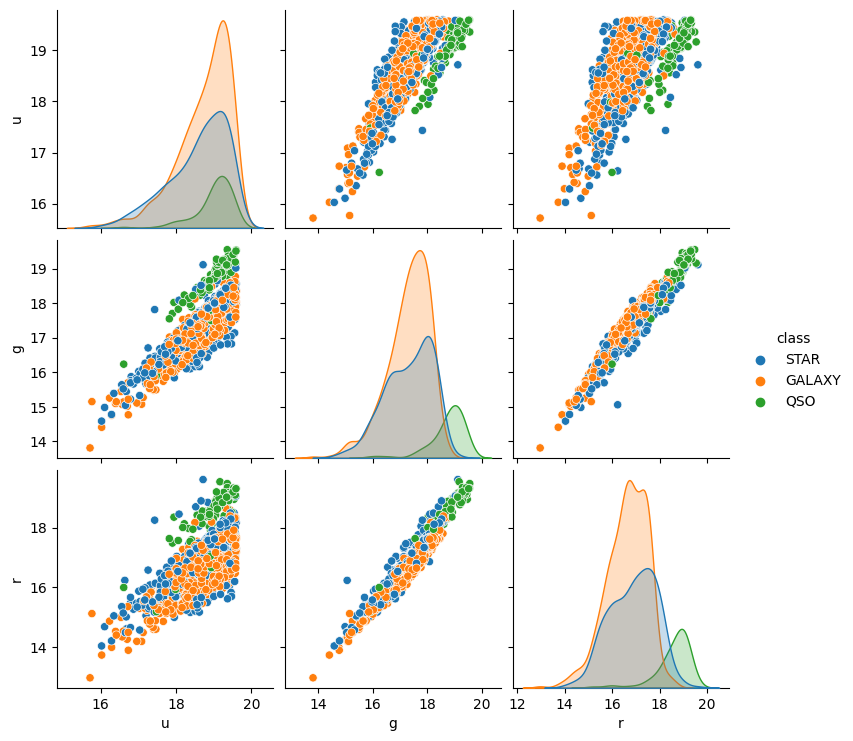

In [ ]:
sns.pairplot(combined_df[['u','g','r','class']], hue='class')

## 3. Cleaning and feature selection

As indicated above, we will eventually be using our data to classify objects into either STAR or GALAXY.

We should therefore do the following:
- Remove rows which are not labelled as STAR/GALAXY
- Remove attributes which we don't think are helpful in the classification process

Normally we would also have to check for and deal with:
1. Missing data (blank, `None`, or `NaN`)
1. Misleading or incorrect data (outliers)
1. Bad data (present but just wrong)
1. Duplicate data

But in order to dive right into the ML I have proivded a clean enough data set that we can skip most of these checks.

Let's remove all rows of data which have "QSO" as the 'class' attribute.

The following might look a little contrived but it's a common idiom in pandas data manipulation.
It is a masking process.

In [ ]:
## Goal: remove QSO to make this a binary classification task
#
# This part returns a column of True/False values, which we use as a mask
#                          |-------------------------|
combined_df = combined_df[ combined_df['class']!='QSO' ]
#             |----------------------------------------|
# In this part we use the mask as an index into the original data frame,
# selecting all rows where the mask is True
#
#-----------|
# In this part we assign the masked data back into the same variable
# effectively we are deleting the data where the mask is false.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Check that the above has worked by calling the `.unique()` method on the 'class' column

In [ ]:
combined_df['class'].unique()

array(['STAR', 'GALAXY'], dtype=object)

We can see how many rows were deleted by looking at the new `.shape` of the data frame.

In [ ]:
combined_df.shape # an attribute not a method

(906, 22)

## 4. Training and applying our model

We now have some clean data which we want to use to train our machine learning model.

Evaluating a model $F$ can mathematically be described as:
$$F(\bar X) → y$$
Where $X$ is a vector of attributes, and $y$ is the predicted label or value.

The task of training a model is effectively to provide many vectors $X$ with known labels $y$ such that our model can learn the rules that make up $F$.

To begin with we need to define the vectors $X$ and $y$.


![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Create a new dataframe called "X" which contains the $(u,g,r,i,z)$ columns from our `combined_df`

Also create a vector of labels called "y" which is the 'class' column from our data frame.

In [ ]:
# The attributes of our data
X = combined_df[['u','g','r','i','z']]

In [ ]:
# The labels for our data
y = combined_df['class']

Our goal here is to train the ML model using the $X$ and $y$ and then make an estimate on how well we think it will perform on new (unseen) data.

To avoid having our ML "cheat" we need to hold back some of the $X$/$y$ data from the training so that we can use it in the testing/evaluation stage.
Having test data in the training set causes leakage, which means that your ML algorithm performs very well on the test data, but not as well on unseen data.

When the ML performs well in testing but poorly on unseen data we say that the ML is *over fitting* the data, and the inverse is *under fitting* the data.
Ideally we want the performance on unseen data to match that which we see on test data.

For now our goal is to split our data into a training and test set.

`scikit-learn` provides us with a range of helper functions for common tasks, and in this case we'll be using the `train_test_split` function to create a test set which is 25% of our data.


In [ ]:
# Split our data into a test/train set
# We use the training set to build our model
# We use the test set to measure the performance of our model
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size=0.25, # use a test size of 25%
                                                                    random_state=4) # this random state ensures that we get the same subset each time we call this cell

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Use the `.shape` attributes of our newly created variables to see how many rows/columns are in each.

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((679, 5), (227, 5), (679,), (227,))

We are now ready to create and train our classifier.

Select the `KNeighborsClassifier` and choose a number of neighbors and wieghting scheme.

Again we are going to see a common idiom:
- create the model with given parameters
- train the model by running `.fit(X_train, y_train)`
- evaluate the model on test data using `.predict(X_test)`
- compare the predicted to known $y$ values

In our case we are going to use the metric called `accuracy` to measure the performance of our ML model.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Use the outline below to construct a KNN classifier with `n_neighbours` as an odd number between 1 and 9, and set the `weights` parameter to be either "distance" or "uniform".

Execute the cell and see how well your model performs.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}')

Accuracy = 0.8546255506607929


🎉 You have just trained your first ML model 🎉

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Go back and re-run the above cell and see what happens when you change the number of neighbors or the weighting scheme.
- How does it affect the accuracy?
- How could we find the **best** values for these parameters?

## 5. Evaluating an ML model


For a classification task there are a number of ways of evaluating the performance of your model.

They rely on the following definitions:
![Confusion Matrix](https://www.researchgate.net/profile/Nimmisha-Shajihan/publication/347447352/figure/fig3/AS:970048604741634@1608289018974/Performance-measurement-TP-TN-FP-FN-are-the-parameters-used-in-the-evaluation-of.jpg)

A type III error is when you confuse a Type I error with a Type II error, which is why I prefer to talk about FP, FN, etc.

In analogy to astronomy terms
- **Precision** is what astronomers call *reliability*.
- **Sensitivity** is what astronomers call *completeness*
- **Accuracy** is just how often your labels are correct

Depending on the type of problem you are tring to solve, you will choose a different metric to optimise for your ML model.

Generally you should maximise:
- Sensitivity, if you want to capture all the real things, and don't mind a few false readings
- Precision, if false readings are particularly harmful, but missing real events are not a problem
- Accuracy, if you are euqally ok with false positives and false negatives

See this [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix) article for a rather long list of all the different measures you can use, and how to calculate them.


We can produce a plot similar to the table above (called a confusion matrix) to help us evaluate the performance of our KNN model.

Again `scikit-learn` has handy convenience functions for this (if you have v2 or higher).

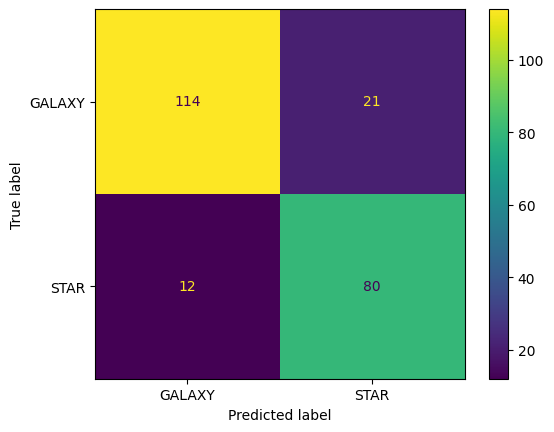

In [ ]:
# Produce a confusion matrix to see what classes were being confused with each other.
# Ideally the diagonal entries will all be 1, and the off-diagonals will be zero
metrics.ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        #normalize='true'
    )

We can also get a nice `classification_report` by providing our test/predicted data.

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.90      0.84      0.87       135
        STAR       0.79      0.87      0.83        92

    accuracy                           0.85       227
   macro avg       0.85      0.86      0.85       227
weighted avg       0.86      0.85      0.86       227



## 6. Optimising the (hyper-) parameters of our ML model

Previously we asked how we could determine the best values for `n_neighbors` and `weights`.
One way to do this is to do a enhaustive search of the hyper-parameter space.
Essentially we need to define a grid of `n_neighbors` and `weights` to iterate over, and then a metric for measuring the peformance of the model.

Again this is a fairly standard process in ML so `scikit-leran` has a ready-to-go function for us called `GridSearchCV`.
We provide the 'grid' of parameters to search over in the form of a dictionary.


![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Use the GridSearchCV template below to search ver the following parameters:
- 'weights' = "uniform" or "disntance"
- 'n_neighbors' a range of (odd) values from 1 to 50 (choose more than 5 values)
- use the 'scoring' metric of "accuracy"

In [ ]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'weights': ('uniform','distance'), # this should be the different weighting schemes
              'n_neighbors':[1,3,5,7,13,17,21,43]} # this should be a list of the nearest neigbhours
# make a classifier object
knn = KNeighborsClassifier()
# create a GridSearchCV object to do the training with cross validation
gscv = model_selection.GridSearchCV(estimator=knn,
                                    param_grid=parameters,
                                    scoring='accuracy')
# now train our model
best_knn = gscv.fit(X_train, y_train)

Once complete we can look at the parameters and score corresponding to the best performing model.

In [ ]:
best_knn.best_params_, best_knn.best_score_

({'n_neighbors': 1, 'weights': 'uniform'}, 0.8792156862745099)

### Cross validation

The "CV" component of `GridSearchCV` refers to cross validation, a process by which we split our training data into training and validation subsets.

Expaning on what we saw in the lecture we have the following breakdown of train/test/validatinn sets:

![CV](https://learningds.org/_images/CVDiagram.png)

We take our full data set (X), and break it into X_train and X_test.
Our machine learning model will never know the true labels for X_test, but we will.

When we trained our KNN model above, we fed it all of the X_train data, and then evaluated that agains the X_test data.
This gave us an estimate of the accuracy of the model.
If our test data and training data were drawn from the same population and have the same make up of classes and correlations between features (etc etc), then we could have some confidence that the measure accuracy would apply to other data as well.

However, if we were to repeatedly modify the hyper-parameters of our model until we obtained the best accuracy on the test data, then we would risk overfitting our data and have a model that doesn't generalise very well to other datasets.

We can avoid overfitting by engaging in cross validation as follows:
1. Take the X_train data and split it into N equally sized subsets, which we call "Folds"
1. Use N-1 folds of data to train our model, and then validate (test) our model using the remaining fold.
1. Repeat (2), choosing a different fold for validation each time.
1. Use the mean/std of the N different accuracy estimates as our final accuarcy measure

By averaging over different splits we can get an estimate of how reproducible our accuracy is (via the std) which also tells us how sensitive our results are to the training data.

A down-side of the above is that the best model parameters that you derive from cross-validation will have only been traind on $(N-1)/N$ of the training data.
Once cross validation has been completed and we have decided on the best parameters to use, we should then recreate our model and train it on the entire X_train data set.

No matter how well we do in the cross-validation step, there is alays the possibility that our X_test data is somehow different from our X_train data so that we might end up with a higher or lower accuracy when measured against the known y_test labels.

We can inspect the detailed results of the cross validaiton process by looking at the `.cv_results_` parameter which is a nested dictionary of all the results we might want.

With some effort we can summarise these results as follows

In [ ]:
print("n_neighbors |  weights |  accuracy +/- std")
for i in range(len(best_knn.cv_results_['params'])):
  print(f"{best_knn.cv_results_['params'][i]['n_neighbors']:4d}   ", end='')
  print(f"{best_knn.cv_results_['params'][i]['weights']:>15s}     ", end='')
  print(f"{best_knn.cv_results_['mean_test_score'][i]: 5.3f}  +/- ", end='')
  print(f"{best_knn.cv_results_['std_test_score'][i]:5.3f}")

n_neighbors |  weights |  accuracy +/- std
   1           uniform      0.879  +/- 0.021
   1          distance      0.879  +/- 0.021
   3           uniform      0.850  +/- 0.021
   3          distance      0.863  +/- 0.027
   5           uniform      0.835  +/- 0.009
   5          distance      0.854  +/- 0.013
   7           uniform      0.813  +/- 0.009
   7          distance      0.841  +/- 0.019
  13           uniform      0.781  +/- 0.010
  13          distance      0.831  +/- 0.011
  17           uniform      0.761  +/- 0.022
  17          distance      0.810  +/- 0.005
  21           uniform      0.760  +/- 0.021
  21          distance      0.794  +/- 0.019
  43           uniform      0.747  +/- 0.030
  43          distance      0.775  +/- 0.028


Now that we know the best parameters for our classifier, recreate our `knn` classifier from above using these best parameters, and train it on all the X_train data

In [ ]:
# use the best n_neighbors and weights
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}')

Accuracy = 0.8458149779735683


![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Is your accuracy higher or lower in this final trained version compared to what our grid search cross-validation indicated?

Since our model is just like any other model we train we can look at the confusion matrix and other metrics as well.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Copy and modify the confusion matrix code from above to create a confusion matrix plot for our `best_knn` estimator.

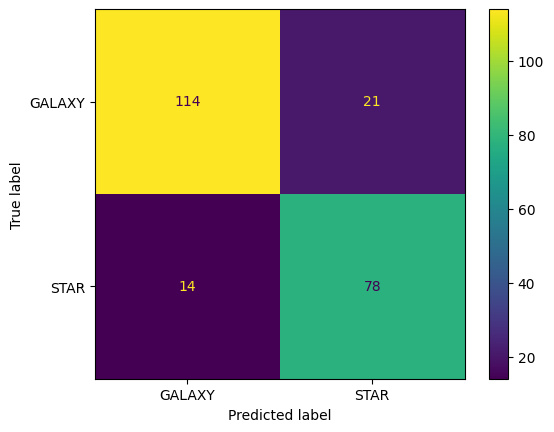

In [ ]:
# Produce a confusion matrix to see what classes were being confused with each other.
# Ideally the diagonal entries will all be 1, and the off-diagonals will be zero
metrics.ConfusionMatrixDisplay.from_estimator(
        best_knn,
        X_test,
        y_test,
        #normalize='true'
    )

We achieved a high, but not super high, accuracy with our grid search.
There are no more hyper-parameters that we can adjust for this model, so is this the limit of our exploration?

Well, no. There are plenty of things that can affect the performance of our model:
- The training and test data set may be mis-matched (different distribution of classes)
- We could have provided too many, not enough, or just not the right attributes
- Maybe the model just isn't well suited to our goals

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

If you have time try chanigng the data split by using a different random see in the `train_test_split` function, and then retraining your model.
Does the accuracy change by an interesting amount?

## 7. Decision Trees

A KNN works by 'wrote learning' a data set and then comparing new data to it's memorised answers.
By contrast, decision trees (DT) work by learning rules that describe the data and then applying these rules to new data.
Compared to KNN, DTs take longer to train, because they need to learn the rules, but are much faster to execute because they don't have to search a large database of answers to generate a classification.

Once constructed, a decision tree is essentially a series of comparisons (nodes), which you evaluate and follow the path until you reach a final answer (a leaf).
Typically we use binary decision tress meaning that each node is connected to child nodes or leafs.
Higher order decision trees are possible, but are isomorphic to binary trees so most implementations are just binary trees with some fancy make-up on.

In the example below the left panel shows a two dimensional data set with attributes $(x_1,x_2)$, and labels of (⬛, ⚫).
During the training process, the algorithm learns the boundary between the two groups (blue line), which is represented by the decision tree shown on the right.

When you want to classify a new data point (🔺), the algorithm will evaluate each of the comaprisons starting at the root node of the tree, until it reaches a leaf node which represents the final class.

![DT](https://www.researchgate.net/profile/Sorin-Draghici-2/publication/6234069/figure/fig1/AS:280550989418502@1443899976800/Binary-Decision-Tree-The-left-panel-shows-the-data-for-a-two-class-decision-problem-with.png)

The training process of a DT involves:
1. choosing a attribute to *split* on ($x_1$ or $x_2$ in the above), (choose the attribute most variance)
1. choosing a numerical value of *where* to split the data into two groups,
1. partitioning the data into two groups and then applying the same algorithm to each group until a stopping condition is met.

The way that the attributes are chosen, the value of the split, and the stopping condition, will all effect the final tree which is created.

The stopping conditions are essentially a measure of how "pure" you want a node to be before you consider it to be "done" and not able to be split any more.
For example, a purity of 0.8 means that when a node has $>=80\%$ of the data coming from one class (eg. ⬛) then the node is labeled and not split any further.
Another stopping condition is the minimum size of a node, if the node has fewer data points than this minimum then it will not be split no matter what the purity is.

The choice of *where* to split the data, is a trial and error approach of considering many different splits and choosing the best according to a measure of goodness.
See [this blog post](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html) for a longer description of the different measures.


Decision trees do not rely on distance/density calculations so are immune to issues associated with data scale/distribution.

### Build a DT

We can move right to using our `GridSearchCV` to explore a range of different possible trees.

The key points that we need to know are the parameters to feed into `DecisionTreeClassifier`, head to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to see what you can pass to `criterion` and `min_samples_split` (there are many more but we'll focus just on these two.

![Challenge](https://cdn.icon-icons.com/icons2/2110/PNG/64/challenge_icon_131034.png)

Use the template below to create a `DescisionTreeClasfier` and train it with the following hyper-parameters:
- 'criterion' = "gini", "entropy", "log_loss"
- 'min_samples_split' a range of values between 10 to 500
- 'max_depth' = 5 (not a range just a set value)

Set the number of cross validations to be 5, and use the "accuracy" metric for scoring.

In [ ]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'criterion': ("gini", "entropy", "log_loss"),  # this should be the different splitting criteria
              'min_samples_split':[10, 25, 45, 50, 100, 200,500], # this should be the different values for min_samples_split
              'max_depth':[8]} # make at most 5 choices, to keep the tree simple enough to visualise
dtc = tree.DecisionTreeClassifier()
gscv = model_selection.GridSearchCV(estimator=dtc,
                                    param_grid=parameters,
                                    cv=5,
                                    scoring='accuracy')
best_dtc = gscv.fit(X_train, y_train)
best_dtc.best_params_, best_dtc.best_score_

({'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 25},
 0.7805882352941177)

Now that we have the best params we should retrain on **all** the test data

In [ ]:
dtc = tree.DecisionTreeClassifier(criterion='entropy',
                                  min_samples_split=25,
                                  max_depth=8)
# Fitting as we did before, fit on train predict on test
best_dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}')

Accuracy = 0.7268722466960352


In [ ]:
# LOOK
print("criterion |  min_samples_split |  accuracy +/- std")
for i in range(len(best_dtc.cv_results_['params'])):
  print(f"{best_dtc.cv_results_['params'][i]['criterion']:4s}   ", end='')
  print(f"{best_dtc.cv_results_['params'][i]['min_samples_split']:>15d}     ", end='')
  print(f"{best_dtc.cv_results_['mean_test_score'][i]: 5.3f}  +/- ", end='')
  print(f"{best_dtc.cv_results_['std_test_score'][i]:5.3f}")

A nice feature of decision trees is that we can inspect the rules that they create.
Below we plot the decision tree that we created above.

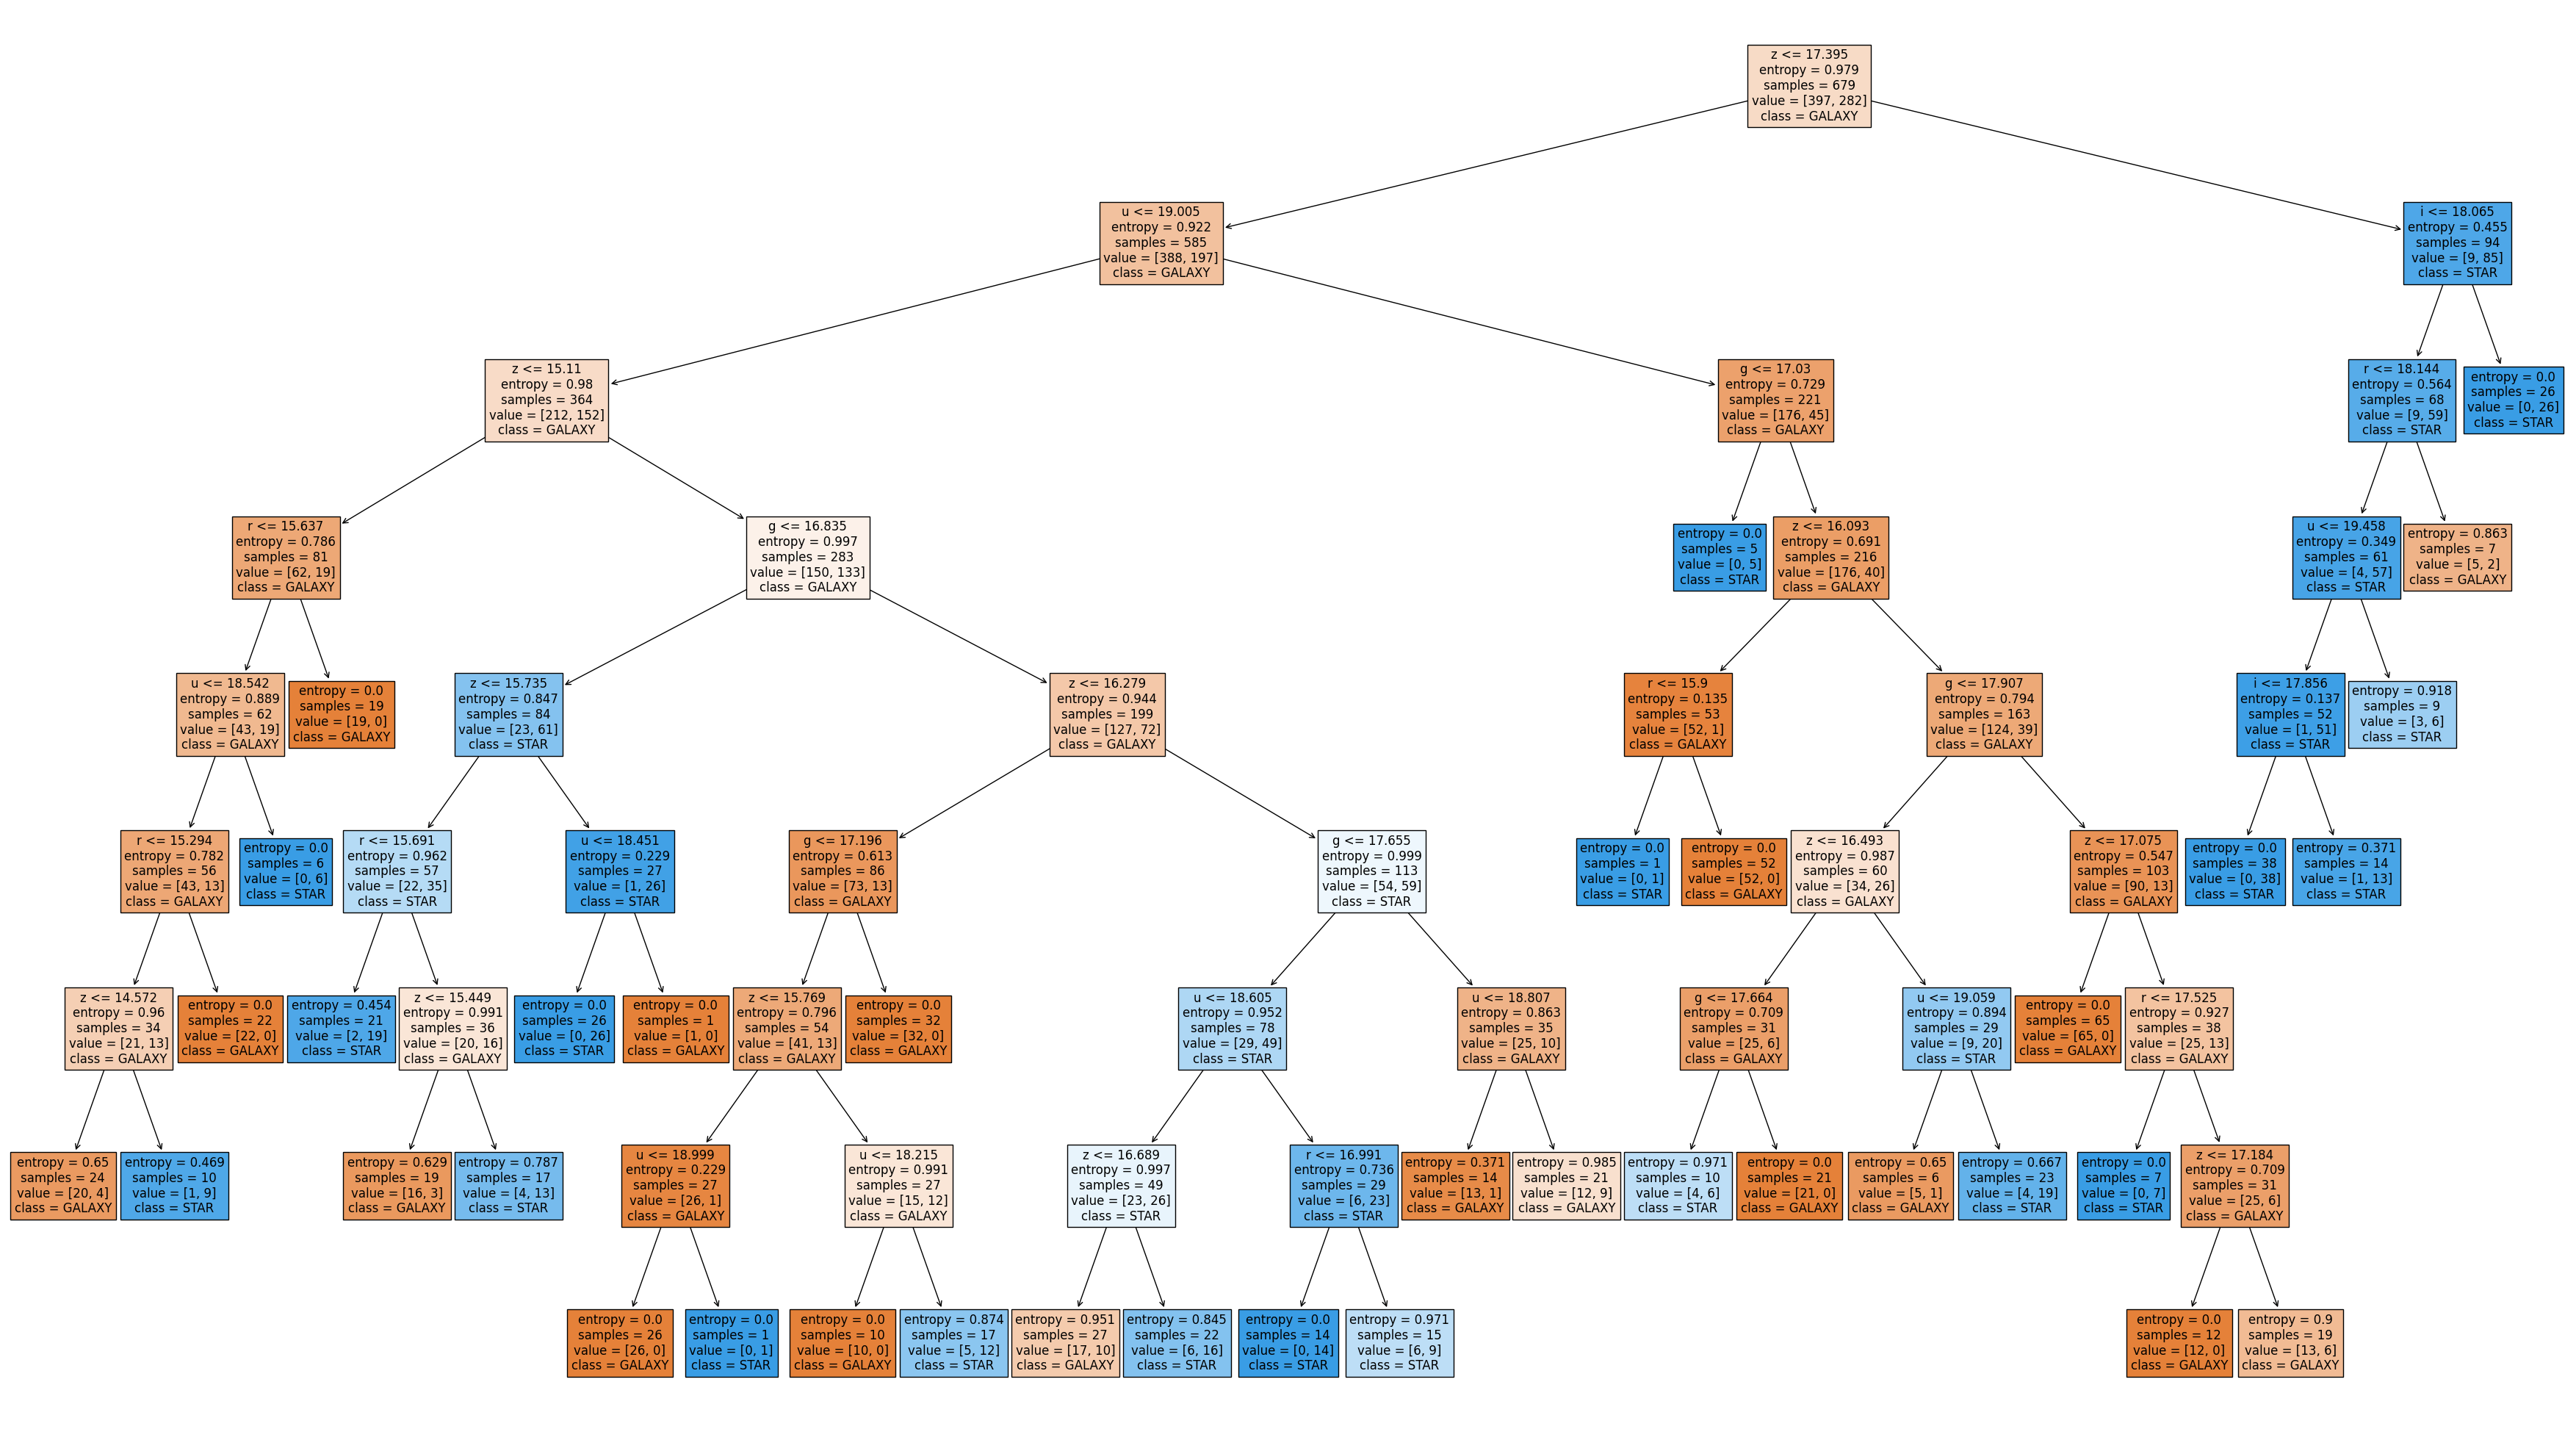

In [ ]:
# make a tree plot

# Convert this into html (interactive)
fig, ax = plt.subplots(1,1, figsize=(45,25)) # Make the plot larger than the defaul so things don't collide so much
tree.plot_tree(dtc,
               filled=True, # color the nodes based on class/purity
               fontsize=12,
               feature_names=X.columns,
               class_names=y_test.unique())
plt.show() # Surpress printing of a bunch of useless info


Note in the above that some of the splitting turned out to be pointless.
For example, in the branch that collects most of the STARs, there are three levels that have a majority class of STAR, if we wanted to simplify our rules we could just prune these extra nodes and replace with a single leaf that just says STAR.

## Explore more
If you have time before the next deep dive try the following:
- **Data scaling**: Rescale the data to have min/max of -1/1 and see how this affects the KNN model we built
- **Cross Validation**: Experiment with different splits of test/train data by changing the random state. How does this affect your results?
- **Feature Selection**: Choose only a subset of the $(u, g, r, i, z)$ features, see how few you can use and still get a "good" classification result.
- **Feature Engineering**: Make new features such as $u-g$ or $g-r$ and see if they help or hinder your ML model.
- **Model tuning**: allow the descision tree to have a greater depth. Experiemnt with a range of depths in the grid search, choosing 3-4 values between 5-20.